###libs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install rasterio

###PSD e MSI final

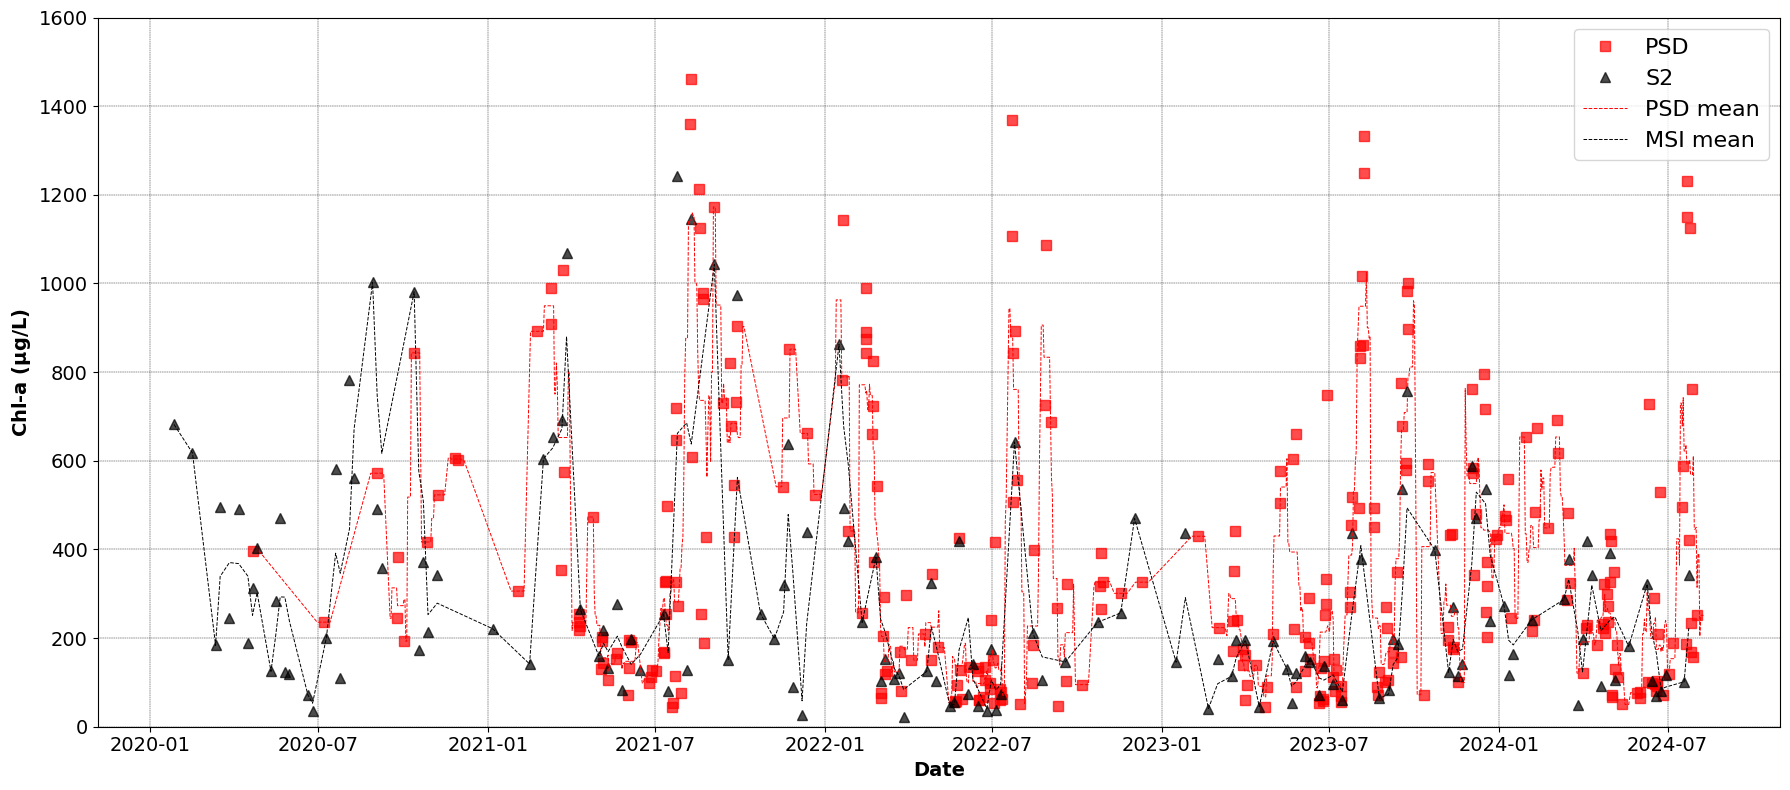

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

def calculate_chl_a(RE_band, red_band):
    """Calcula o NDCI a partir das bandas vermelhas e red edge."""
    ndci = (RE_band - red_band) / (RE_band + red_band + 0.00001)  # +0.00001 para evitar divisão por zero
    chl_a = 23.44 * ((ndci + 1)**7.95)
    return chl_a

def process_image(filename):
    """Processa uma única imagem, calcula o NDCI e retorna a mediana."""
    with rasterio.open(filename) as src:
        # Assumindo que as bandas vermelhas e RE são as bandas 6 e 7
        RE_band = src.read(7)
        red_band = src.read(6)

        chl_a = calculate_chl_a(RE_band, red_band)
        mean_chl_a = np.nanmedian(chl_a)

        # Extrai a data do nome do arquivo e converte para datetime
        basename = os.path.basename(filename)
        date_str = basename.split("_")[0]
        try:
            date = datetime.strptime(date_str, '%Y-%m-%d')  # Assumindo formato YYYY-MM-DD
        except ValueError as e:
            print(f"Erro ao converter a data do arquivo {filename}: {e}")
            return None, None

        return date, mean_chl_a

# Substitua pelo caminho da pasta contendo as imagens
image_folder = "/content/drive/MyDrive/mestrado/dissertacao/serie_temporal/psd/bill"

all_dates1 = []
all_chl_a_values1 = []

for filename in os.listdir(image_folder):
    if filename.endswith(".tif"):
        date, chl_a_value = process_image(os.path.join(image_folder, filename))
        if date is not None and not np.isnan(chl_a_value) and chl_a_value <= 2500:  # Filtra valores maiores que 2500
            all_dates1.append(date)
            all_chl_a_values1.append(chl_a_value)

# Ordena as datas cronologicamente
sorted_pairs1 = sorted(zip(all_dates1, all_chl_a_values1))
all_dates1, all_chl_a_values1 = zip(*sorted_pairs1)


# Converte a coluna de data para o formato datetime
df['date'] = pd.to_datetime(df['date'])

df_psd = pd.DataFrame({
    'date': all_dates1,
    'chl-a_psd': all_chl_a_values1
})


# Plota o gráfico
plt.figure(figsize=(18, 8))
plt.plot(all_dates1, all_chl_a_values1, marker='s',  markersize=7, linestyle='None', linewidth=0.5, label='PSD', alpha=0.7, color='red')
plt.plot(df['date'], df['chla_median'], marker='^', markersize=7, linestyle='None', linewidth=0.5, label='S2', alpha=0.7, color='black')
plt.plot(chl_a_moving_average_dates, chl_a_moving_average_values, color='red', linestyle='--', linewidth=0.7, label='PSD mean')
#plt.plot(all_dates1[window_size-1:], chl_a_moving_average, color='red', linestyle='--', linewidth=0.7, label= 'PSD mean')
plt.plot(filtered_df.index, filtered_df['chla_moving_avg'], label='MSI mean', color='black', linestyle='--', linewidth=0.7)
#plt.plot(filtered_df['date'], filtered_df['chla_moving_avg'], label='MSI mean', linestyle='--', color='black', linewidth=0.7)

plt.xlabel("Date", fontsize=14, fontweight='bold')
plt.ylabel(r"Chl-$\mathit{\mathbf{a}}$ (µg/L)", fontsize=14, fontweight='bold')
plt.ylim([0, 1600])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.tight_layout()
plt.grid(color='black', linestyle='--', linewidth=0.3)

# Adiciona a anotação com o número de pares de imagens processadas
#num_pairs = len(all_dates1)
#plt.text(0.05, 0.95, f'N = {num_pairs}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()


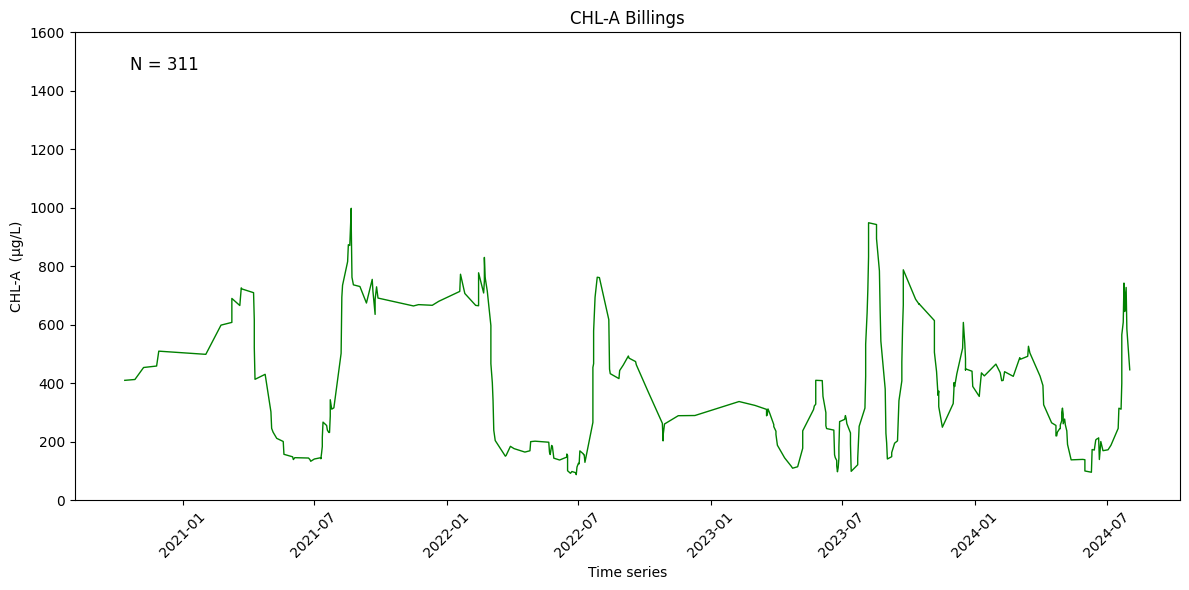

In [ ]:
""" MEDIA MOVEL POR REGISTRO"""

import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

def calculate_chl_a(RE_band, red_band):
    """Calcula o NDCI a partir das bandas vermelhas e red edge."""
    ndci = (RE_band - red_band) / (RE_band + red_band + 0.00001)  # +0.00001 para evitar divisão por zero
    chl_a = 23.44 * ((ndci + 1)**7.95)
    return chl_a

def process_image(filename):
    """Processa uma única imagem, calcula o NDCI e retorna a mediana."""
    with rasterio.open(filename) as src:
        # Assumindo que as bandas vermelhas e RE são as bandas 6 e 7
        RE_band = src.read(7)
        red_band = src.read(6)

        chl_a = calculate_chl_a(RE_band, red_band)
        mean_chl_a = np.nanmedian(chl_a)

        # Extrai a data do nome do arquivo e converte para datetime
        basename = os.path.basename(filename)
        date_str = basename.split("_")[0]
        try:
            date = datetime.strptime(date_str, '%Y-%m-%d')  # Assumindo formato YYYY-MM-DD
        except ValueError as e:
            print(f"Erro ao converter a data do arquivo {filename}: {e}")
            return None, None

        return date, mean_chl_a

# Substitua pelo caminho da pasta contendo as imagens
image_folder = "/content/drive/MyDrive/mestrado/dissertacao/serie_temporal/psd/bill"

all_dates1 = []
all_chl_a_values1 = []

for filename in os.listdir(image_folder):
    if filename.endswith(".tif"):
        date, chl_a_value = process_image(os.path.join(image_folder, filename))
        if date is not None and not np.isnan(chl_a_value) and chl_a_value <= 2500:  # Filtra valores maiores que 1500
            all_dates1.append(date)
            all_chl_a_values1.append(chl_a_value)

# Ordena as datas cronologicamente
sorted_pairs1 = sorted(zip(all_dates1, all_chl_a_values1))
all_dates1, all_chl_a_values1 = zip(*sorted_pairs1)

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Defina o tamanho da janela para a média móvel
window_size = 7  # Ajuste conforme necessário
chl_a_moving_average = moving_average(all_chl_a_values1, window_size)




# Plota o gráfico
plt.figure(figsize=(12, 6))
plt.plot(all_dates1[window_size-1:], chl_a_moving_average, color='green', linestyle='-', linewidth=1, label=f'Média Móvel ({window_size} pontos)')
plt.title("CHL-A Billings")
plt.xlabel("Time series")
plt.ylabel("CHL-A  (µg/L)")
plt.ylim([0, 1600])
plt.xticks(rotation=45)
plt.tight_layout()

# Adiciona a anotação com o número de pares de imagens processadas
num_pairs = len(all_dates1)
plt.text(0.05, 0.95, f'N = {num_pairs}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


plt.show()


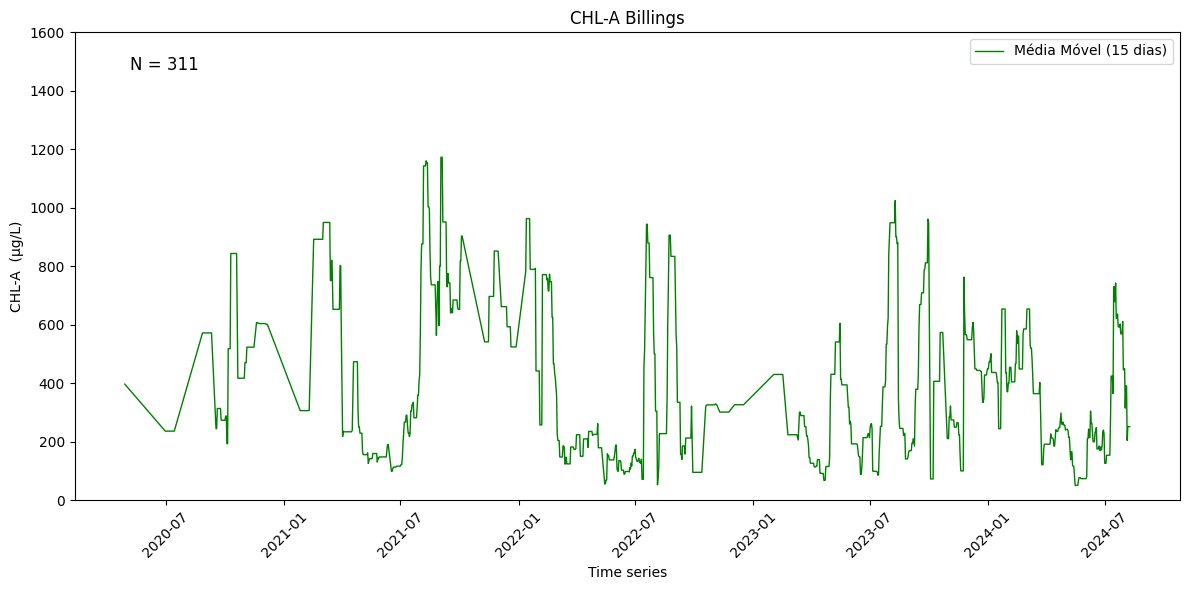

In [ ]:
"""MEDIA MOVEL POR DATA 30 DIAS"""

import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

def calculate_chl_a(RE_band, red_band):
    """Calcula o NDCI a partir das bandas vermelhas e red edge."""
    ndci = (RE_band - red_band) / (RE_band + red_band + 0.00001)  # +0.00001 para evitar divisão por zero
    chl_a = 23.44 * ((ndci + 1)**7.95)
    return chl_a

def process_image(filename):
    """Processa uma única imagem, calcula o NDCI e retorna a mediana."""
    with rasterio.open(filename) as src:
        # Assumindo que as bandas vermelhas e RE são as bandas 6 e 7
        RE_band = src.read(7)
        red_band = src.read(6)

        chl_a = calculate_chl_a(RE_band, red_band)
        mean_chl_a = np.nanmedian(chl_a)

        # Extrai a data do nome do arquivo e converte para datetime
        basename = os.path.basename(filename)
        date_str = basename.split("_")[0]
        try:
            date = datetime.strptime(date_str, '%Y-%m-%d')  # Assumindo formato YYYY-MM-DD
        except ValueError as e:
            print(f"Erro ao converter a data do arquivo {filename}: {e}")
            return None, None

        return date, mean_chl_a

# Substitua pelo caminho da pasta contendo as imagens
image_folder = "/content/drive/MyDrive/mestrado/dissertacao/serie_temporal/psd/bill"

all_dates1 = []
all_chl_a_values1 = []

for filename in os.listdir(image_folder):
    if filename.endswith(".tif"):
        date, chl_a_value = process_image(os.path.join(image_folder, filename))
        if date is not None and not np.isnan(chl_a_value) and chl_a_value <= 2500:  # Filtra valores maiores que 2500
            all_dates1.append(date)
            all_chl_a_values1.append(chl_a_value)

# Ordena as datas cronologicamente
sorted_pairs1 = sorted(zip(all_dates1, all_chl_a_values1))
all_dates1, all_chl_a_values1 = zip(*sorted_pairs1)

def moving_average_by_date(dates, values, window_days):
    """Calcula a média móvel baseada em janelas de tempo de `window_days` dias."""
    moving_avg_dates = []
    moving_avg_values = []
    start_date = dates[0]
    end_date = dates[-1]
    current_date = start_date

    while current_date <= end_date:
        window_start = current_date
        window_end = current_date + timedelta(days=window_days)
        window_values = [value for date, value in zip(dates, values) if window_start <= date < window_end]

        if window_values:
            moving_avg_dates.append(current_date + timedelta(days=window_days // 2))
            moving_avg_values.append(np.mean(window_values))

        current_date += timedelta(days=1)  # Avança um dia

    return moving_avg_dates, moving_avg_values

# Defina o tamanho da janela para a média móvel (30 dias)
window_days = 15
chl_a_moving_average_dates, chl_a_moving_average_values = moving_average_by_date(all_dates1, all_chl_a_values1, window_days)

# Plota o gráfico
plt.figure(figsize=(12, 6))
plt.plot(chl_a_moving_average_dates, chl_a_moving_average_values, color='green', linestyle='-', linewidth=1, label=f'Média Móvel ({window_days} dias)')
plt.title("CHL-A Billings")
plt.xlabel("Time series")
plt.ylabel("CHL-A  (µg/L)")
plt.ylim([0, 1600])
plt.xticks(rotation=45)
plt.tight_layout()

# Adiciona a anotação com o número de pares de imagens processadas
num_pairs = len(all_dates1)
plt.text(0.05, 0.95, f'N = {num_pairs}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.legend()
plt.show()


In [ ]:
# Contar quantas datas o valor de Chl-a é maior que 100
count_above_100 = sum(1 for date, chl_a in sorted_pairs1 if chl_a > 100)

print(f"Número de datas com Chl-a maior que 100: {count_above_100}")

Número de datas com Chl-a maior que 100: 257


###S2 local

In [ ]:
import rasterio
import numpy as np

def calculate_chl_a(RE_band, red_band):
    """Calcula o NDCI a partir das bandas vermelha e red edge e retorna a clorofila-a."""
    ndci = (RE_band - red_band) / (RE_band + red_band + 0.00001)  # +0.00001 para evitar divisão por zero
    chl_a = 23.44 * ((ndci + 1)**7.95)
    return chl_a

def process_image(file_path_red, file_path_red_edge):
    """Processa as imagens e calcula a clorofila-a."""
    with rasterio.open(file_path_red) as src_red, rasterio.open(file_path_red_edge) as src_red_edge:
        # Ler as bandas
        red_band = src_red.read(1).astype(np.float32)
        red_edge_band = src_red_edge.read(1).astype(np.float32)

        # Garantir que as dimensões sejam iguais
        if red_band.shape != red_edge_band.shape:
            raise ValueError("As dimensões das bandas não coincidem")

        # Calcular a clorofila-a
        chl_a = calculate_chl_a(red_edge_band, red_band)

        return chl_a, src_red.profile

# Exemplo de uso
file_path_red = '/content/drive/MyDrive/mestrado/dissertacao/serie_temporal/figura_imagens/s2/20210928_B04.tif'     # Substitua pelo caminho para a banda vermelha
file_path_red_edge = '/content/drive/MyDrive/mestrado/dissertacao/serie_temporal/figura_imagens/s2/20210928_B05.tif'  # Substitua pelo caminho para a banda red edge

chl_a_result, profile = process_image(file_path_red, file_path_red_edge)

# Salvar o resultado em um novo arquivo TIFF (opcional)
profile.update(dtype=rasterio.float32, count=1, compress='lzw')  # Atualizar o perfil sem a opção TILED

with rasterio.open('clorofila_a.tif', 'w', **profile) as dst:
    dst.write(chl_a_result, 1)


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from skimage.transform import resize

def calculate_chl_a(RE_band, red_band):
    """Calcula o NDCI a partir das bandas vermelhas e red edge."""
    ndci = (RE_band - red_band) / (RE_band + red_band + 0.00001)  # +0.00001 para evitar divisão por zero
    chl_a = 23.44 * ((ndci + 1)**7.95)
    return chl_a

def process_image(filename_b04, filename_b05):
    """Processa uma única imagem, calcula o NDCI e retorna a média."""
    with rasterio.open(filename_b04) as src_b04, rasterio.open(filename_b05) as src_b05:
        red_band = src_b04.read(1)  # Banda B04
        RE_band = src_b05.read(1)  # Banda B05

        # Redimensiona a banda B05 para combinar com a forma da banda B04
        if red_band.shape != RE_band.shape:
            RE_band = resize(RE_band, red_band.shape, mode='reflect', anti_aliasing=True)

        chl_a = calculate_chl_a(RE_band, red_band)
        #mean_chl_a = np.nanmean(chl_a)
        mean_chl_a = np.nanmedian(chl_a)

        # Extrai a data do nome do arquivo e converte para datetime
        basename = os.path.basename(filename_b04)
        date_str = basename[11:19]
        try:
            date = datetime.strptime(date_str, '%Y%m%d')  # Assumindo formato YYYYMMDD

        except ValueError as e:
            print(f"Erro ao converter a data do arquivo {filename_b04}: {e}")
            return None, None

        return date, mean_chl_a

# Substitua pelo caminho da pasta contendo as imagens
image_folder = "/content/drive/MyDrive/mestrado/dissertacao/serie_temporal/s2/bill/clip"

all_dates = []
all_chl_a_values = []

files_b04 = [f for f in os.listdir(image_folder) if f.endswith(".tiff") and "_B04_" in f]
files_b05 = [f for f in os.listdir(image_folder) if f.endswith(".tiff") and "_B05_" in f]

# Ordena os arquivos para garantir que eles sejam pareados corretamente
files_b04.sort()
files_b05.sort()

for file_b04 in files_b04:
    # Encontra o arquivo correspondente da banda B05
    date_str_b04 = file_b04[11:19]
    corresponding_file_b05 = next((f for f in files_b05 if date_str_b04 in f), None)

    if corresponding_file_b05:
        date, chl_a_value = process_image(os.path.join(image_folder, file_b04), os.path.join(image_folder, corresponding_file_b05))
        if date is not None and not np.isnan(chl_a_value):# and chl_a_value <= 1500:  # Filtra valores maiores que 1500
            all_dates.append(date)
            all_chl_a_values.append(chl_a_value)

# Ordena as datas cronologicamente
sorted_pairs3 = sorted(zip(all_dates, all_chl_a_values))
all_dates, all_chl_a_values = zip(*sorted_pairs3)

# Plota o gráfico
plt.figure(figsize=(12, 6))
#plt.plot(all_dates, all_chl_a_values, marker='o', markersize=4, markerfacecolor='green', linestyle='--', color='green', label='S2')
#plt.plot(all_dates1, all_chl_a_values1, marker='o', markersize=4, markerfacecolor='blue', linestyle='--', color='blue', label='PSD')

plt.plot(all_dates1, all_chl_a_values1, marker='s', markersize=5, linestyle='--', linewidth=0.5,  label='PSD', alpha=0.7)
plt.plot(all_dates, all_chl_a_values, marker='^', markersize=5, linestyle='--', linewidth=0.5, label='S2', alpha=0.7)


plt.title("CHL-A Billings")
plt.xlabel("Time series")
plt.ylabel("CHL-A (µg/L)")
plt.ylim([0, 1600])
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

# Adiciona a anotação com o número de pares de imagens processadas
#num_pairs = len(all_dates)
#plt.text(0.05, 0.95, f'N = {num_pairs}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()


NameError: name 'all_dates1' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Contar quantas datas o valor de Chl-a é maior que 100
count_above_100 = sum(1 for date, chl_a in sorted_pairs3 if chl_a > 100)

print(f"Número de datas com Chl-a maior que 100: {count_above_100}")

Número de datas com Chl-a maior que 100: 15


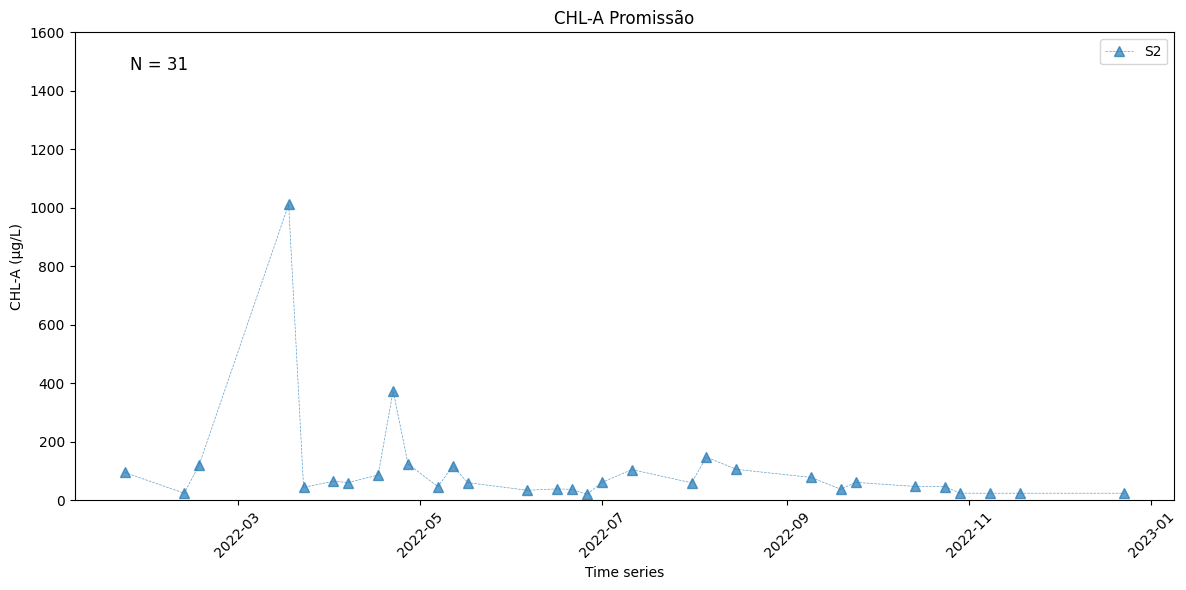

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from skimage.transform import resize

def calculate_chl_a(RE_band, red_band):
    """Calcula o NDCI a partir das bandas vermelhas e red edge."""
    ndci = (RE_band - red_band) / (RE_band + red_band + 0.00001)  # +0.00001 para evitar divisão por zero
    chl_a = 23.44 * ((ndci + 1)**7.95)
    return chl_a

def process_image(filename_b04, filename_b05):
    """Processa uma única imagem, calcula o NDCI e retorna a média."""
    with rasterio.open(filename_b04) as src_b04, rasterio.open(filename_b05) as src_b05:
        red_band = src_b04.read(1)  # Banda B04
        RE_band = src_b05.read(1)  # Banda B05

        # Redimensiona a banda B05 para combinar com a forma da banda B04
        if red_band.shape != RE_band.shape:
            RE_band = resize(RE_band, red_band.shape, mode='reflect', anti_aliasing=True)

        chl_a = calculate_chl_a(RE_band, red_band)
        #mean_chl_a = np.nanmean(chl_a)
        mean_chl_a = np.nanmedian(chl_a)

        # Extrai a data do nome do arquivo e converte para datetime
        basename = os.path.basename(filename_b04)
        date_str = basename[11:19]
        try:
            date = datetime.strptime(date_str, '%Y%m%d')  # Assumindo formato YYYYMMDD

        except ValueError as e:
            print(f"Erro ao converter a data do arquivo {filename_b04}: {e}")
            return None, None

        return date, mean_chl_a

# Substitua pelo caminho da pasta contendo as imagens
image_folder = "/content/drive/MyDrive/mestrado/dissertacao/serie_temporal/s2/prom/clip"

all_dates4 = []
all_chl_a_values4 = []

files_b04 = [f for f in os.listdir(image_folder) if f.endswith(".tiff") and "_B04_" in f]
files_b05 = [f for f in os.listdir(image_folder) if f.endswith(".tiff") and "_B05_" in f]

# Ordena os arquivos para garantir que eles sejam pareados corretamente
files_b04.sort()
files_b05.sort()

for file_b04 in files_b04:
    # Encontra o arquivo correspondente da banda B05
    date_str_b04 = file_b04[11:19]
    corresponding_file_b05 = next((f for f in files_b05 if date_str_b04 in f), None)

    if corresponding_file_b05:
        date, chl_a_value = process_image(os.path.join(image_folder, file_b04), os.path.join(image_folder, corresponding_file_b05))
        if date is not None and not np.isnan(chl_a_value) and chl_a_value <= 2500:  # Filtra valores maiores que 2500
            all_dates4.append(date)
            all_chl_a_values4.append(chl_a_value)

# Ordena as datas cronologicamente
sorted_pairs4 = sorted(zip(all_dates4, all_chl_a_values4))
all_dates4, all_chl_a_values4 = zip(*sorted_pairs4)

# Plota o gráfico
plt.figure(figsize=(12, 6))
#plt.plot(all_dates, all_chl_a_values, marker='o', markersize=4, markerfacecolor='green', linestyle='--', color='green', label='S2')
#plt.plot(all_dates1, all_chl_a_values1, marker='o', markersize=4, markerfacecolor='blue', linestyle='--', color='blue', label='PSD')

#plt.plot(all_dates2, all_chl_a_values2, marker='s', markersize=7, linestyle='--', linewidth=0.5, label='PSD', alpha=0.7)
plt.plot(all_dates4, all_chl_a_values4, marker='^', markersize=7, linestyle='--', linewidth=0.5, label='S2', alpha=0.7)


plt.title("CHL-A Promissão")
plt.xlabel("Time series")
plt.ylabel("CHL-A (µg/L)")
plt.ylim([0, 1600])
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

# Adiciona a anotação com o número de pares de imagens processadas
num_pairs = len(all_dates4)
plt.text(0.05, 0.95, f'N = {num_pairs}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()


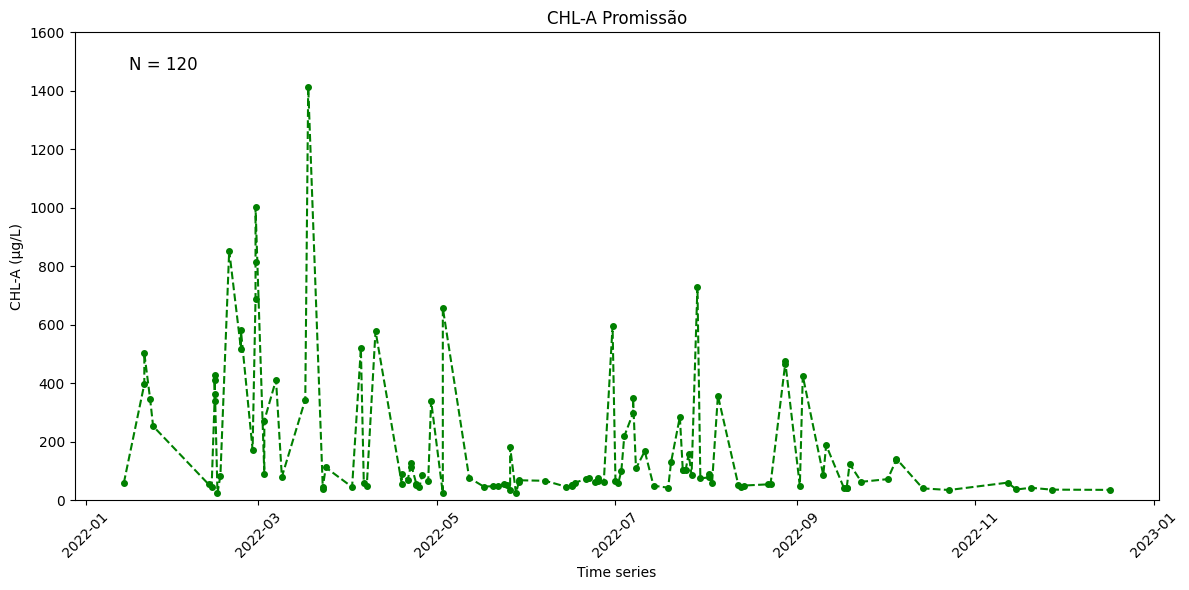

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

def calculate_chl_a(RE_band, red_band):
    """Calcula o NDCI a partir das bandas vermelhas e red edge."""
    ndci = (RE_band - red_band) / (RE_band + red_band + 0.00001)  # +0.00001 para evitar divisão por zero
    chl_a = 23.44 * ((ndci + 1)**7.95)
    return chl_a

def process_image(filename):
    """Processa uma única imagem, calcula o NDCI e retorna a média."""
    with rasterio.open(filename) as src:
        # Assumindo que as bandas vermelhas e RE são as bandas 6 e 7
        RE_band = src.read(7)
        red_band = src.read(6)

        chl_a = calculate_chl_a(RE_band, red_band)
        #mean_chl_a = np.nanmean(chl_a)
        mean_chl_a = np.nanmedian(chl_a)


        # Extrai a data do nome do arquivo e converte para datetime
        basename = os.path.basename(filename)
        date_str = basename.split("_")[0]
        try:
            date = datetime.strptime(date_str, '%Y-%m-%d')  # Assumindo formato YYYY-MM-DD
        except ValueError as e:
            print(f"Erro ao converter a data do arquivo {filename}: {e}")
            return None, None

        return date, mean_chl_a

# Substitua pelo caminho da pasta contendo as imagens
image_folder = "/content/drive/MyDrive/mestrado/dissertacao/serie_temporal/psd/prom"

all_dates2 = []
all_chl_a_values2 = []

for filename in os.listdir(image_folder):
    if filename.endswith(".tif"):
        date, chl_a_value = process_image(os.path.join(image_folder, filename))
        if date is not None and not np.isnan(chl_a_value) and chl_a_value <= 2500:  # Filtra valores maiores que 1500
            all_dates2.append(date)
            all_chl_a_values2.append(chl_a_value)

# Ordena as datas cronologicamente
sorted_pairs2 = sorted(zip(all_dates2, all_chl_a_values2))
all_dates2, all_chl_a_values2 = zip(*sorted_pairs2)

# Plota o gráfico
plt.figure(figsize=(12, 6))
plt.plot(all_dates2, all_chl_a_values2, marker='o', markersize=4, markerfacecolor='green', linestyle='--', color='green')
plt.title("CHL-A Promissão")
plt.xlabel("Time series")
plt.ylabel("CHL-A (µg/L)")
plt.ylim([0, 1600])
plt.xticks(rotation=45)
plt.tight_layout()

# Adiciona a anotação com o número de pares de imagens processadas
num_pairs = len(all_dates2)
plt.text(0.05, 0.95, f'N = {num_pairs}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()


In [ ]:
# Contar quantas datas o valor de Chl-a é maior que 100
count_above_100 = sum(1 for date, chl_a in sorted_pairs4 if chl_a > 100)

print(f"Número de datas com Chl-a maior que 100: {count_above_100}")

Número de datas com Chl-a maior que 100: 8


### S2 chl-a from gee

In [ ]:
import ee
import geemap
import pandas as pd

# Autenticar e inicializar o Google Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-daee')

# Define a coleção de imagens Sentinel-2
sentinel2 = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")

# Define as datas de início e término
startDate = '2020-01-01'
endDate = '2024-08-03'

# Define o bounding box (bbox)
bbox = ee.FeatureCollection("projects/ee-daee/assets/bbox_bill").geometry()

# Função para calcular a porcentagem de nuvens em uma imagem
def cloud_coverage(image):
    cloud_prob = image.select('MSK_CLDPRB')
    cloud_mask = cloud_prob.gt(0)
    cloud_percentage = cloud_mask.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=bbox,
        scale=10
    ).get('MSK_CLDPRB')
    return image.set('CLOUDY_PERCENTAGE', cloud_percentage)

# Filtra a coleção de imagens com base na data e na área de interesse
filteredCollection = sentinel2.filterDate(startDate, endDate).filterBounds(bbox).map(cloud_coverage)

# Filtra a coleção para incluir apenas imagens com 0% de cobertura de nuvens
filteredCollection = filteredCollection.filter(ee.Filter.eq('CLOUDY_PERCENTAGE', 0))

# Função para calcular o NDCI e Chl-a
def calculate_ndci_chla(image):
    RE_band = image.select('B5')
    red_band = image.select('B4')
    ndci = RE_band.subtract(red_band).divide(RE_band.add(red_band).add(0.00001)).rename('NDCI')
    chl_a = ee.Image.constant(23.44).multiply(ndci.add(1).pow(7.95)).rename('Chl-a')
    return image.addBands(ndci).addBands(chl_a)

# Aplica o cálculo do NDCI e Chl-a a cada imagem
calculatedCollection = filteredCollection.map(calculate_ndci_chla)

# Função para obter a mediana dos valores de NDCI e Chl-a dentro do bounding box
def get_median_values(image):
    ndci_median = image.select('NDCI').reduceRegion(
        reducer=ee.Reducer.median(),
        geometry=bbox,
        scale=10
    ).get('NDCI')

    chla_median = image.select('Chl-a').reduceRegion(
        reducer=ee.Reducer.median(),
        geometry=bbox,
        scale=10
    ).get('Chl-a')

    date = image.date().format('YYYY-MM-dd')

    return ee.Feature(None, {
        'date': date,
        'ndci_median': ndci_median,
        'chla_median': chla_median
    })

# Aplica a função para obter os valores medianos a cada imagem e coleta os resultados
median_features = calculatedCollection.map(get_median_values)

# Converte os resultados para uma lista de dicionários
median_dicts = median_features.getInfo()['features']

# Converte a lista de dicionários para um DataFrame
results = [{'date': f['properties']['date'], 'ndci_median': f['properties']['ndci_median'], 'chla_median': f['properties']['chla_median']} for f in median_dicts]
df = pd.DataFrame(results)

# Exibe o DataFrame
print(df)


<ipython-input-4-7ad103273f2a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ndci_moving_avg'] = filtered_df['ndci_median'].rolling(window=3).mean()
<ipython-input-4-7ad103273f2a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chla_moving_avg'] = filtered_df['chla_median'].rolling(window=7).mean()
<ipython-input-4-7ad103273f2a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

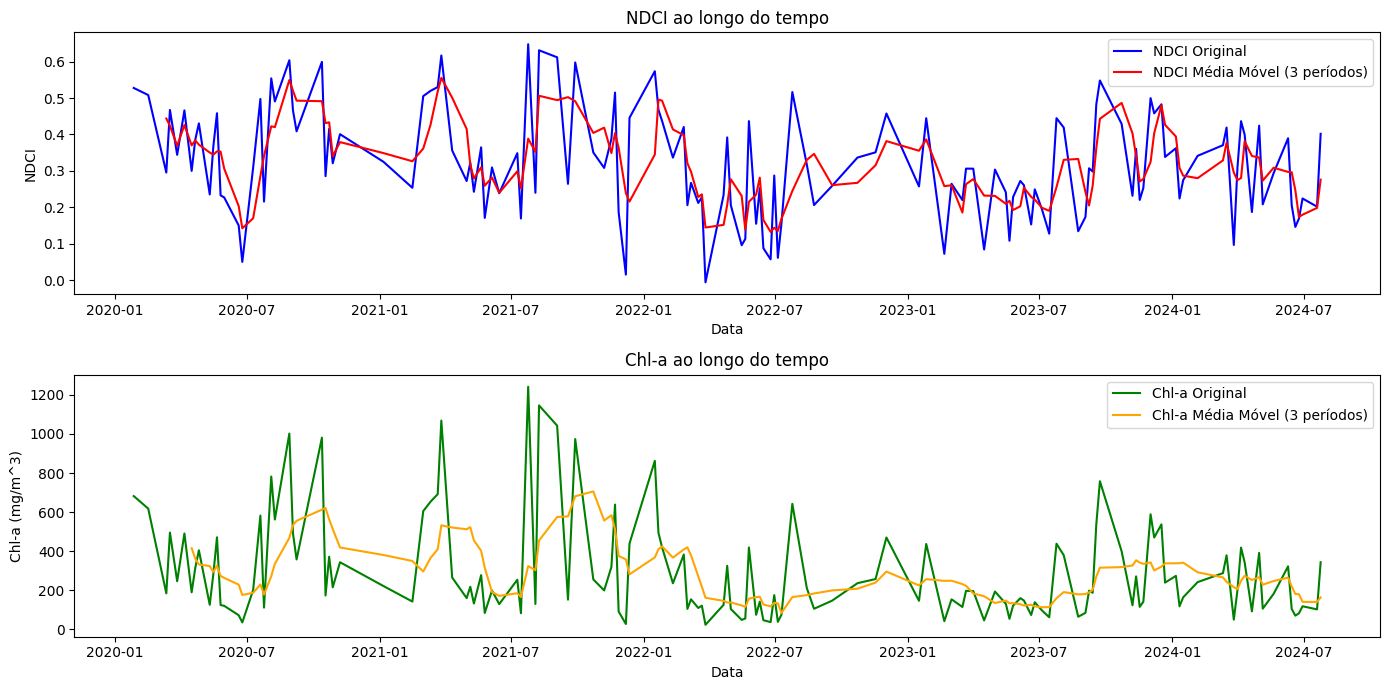

In [ ]:
import matplotlib.pyplot as plt

# Filtra os valores de Chl-a acima de 1500
filtered_df = df[df['chla_median'] <= 1500]

# Calcula a média móvel de 3 períodos
filtered_df['ndci_moving_avg'] = filtered_df['ndci_median'].rolling(window=3).mean()
filtered_df['chla_moving_avg'] = filtered_df['chla_median'].rolling(window=7).mean()

# Converte a coluna de data para datetime
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Plota os resultados
plt.figure(figsize=(14, 7))

# Plot NDCI
plt.subplot(2, 1, 1)
plt.plot(filtered_df['date'], filtered_df['ndci_median'], label='NDCI Original', color='blue')
plt.plot(filtered_df['date'], filtered_df['ndci_moving_avg'], label='NDCI Média Móvel (3 períodos)', color='red')
plt.title('NDCI ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('NDCI')
plt.legend()

# Plot Chl-a
plt.subplot(2, 1, 2)
plt.plot(filtered_df['date'], filtered_df['chla_median'], label='Chl-a Original', color='green')
plt.plot(filtered_df['date'], filtered_df['chla_moving_avg'], label='Chl-a Média Móvel (3 períodos)', color='orange')
plt.title('Chl-a ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Chl-a (mg/m^3)')
plt.legend()

plt.tight_layout()
plt.show()



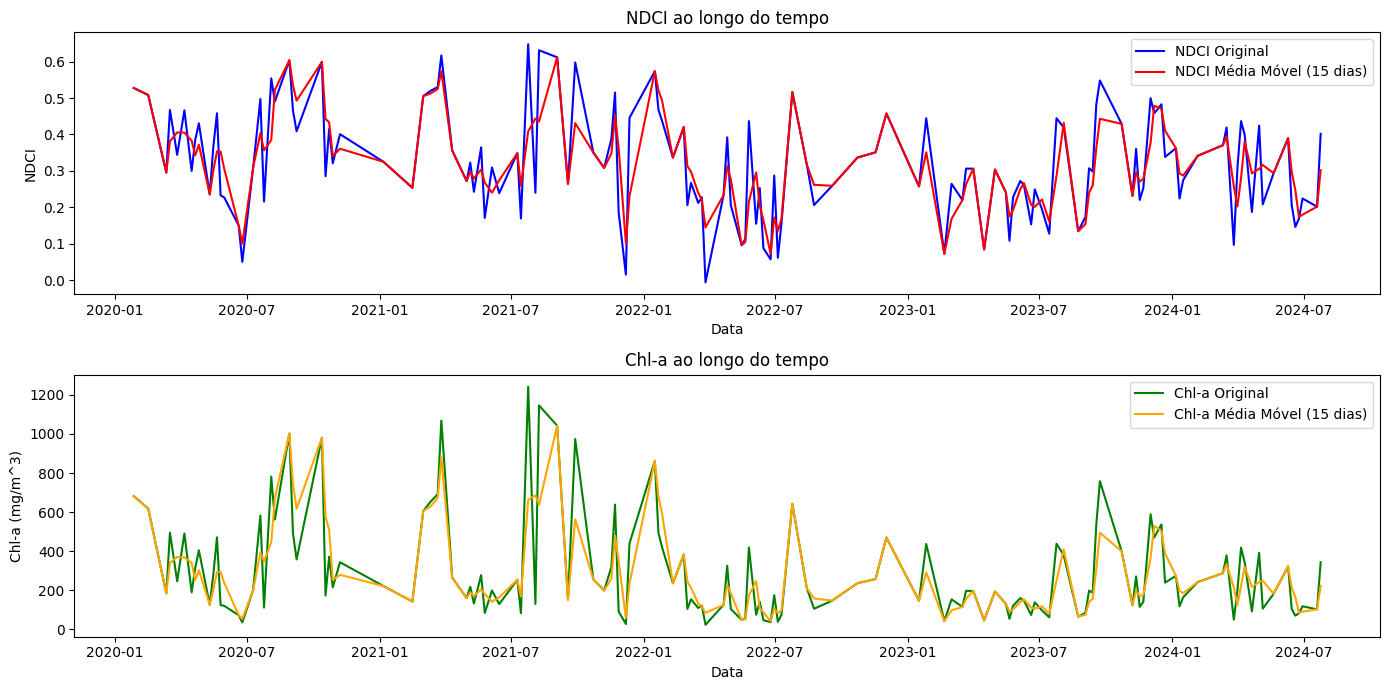

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtra os valores de Chl-a acima de 1500
filtered_df = df[df['chla_median'] <= 1500].copy()

# Converte a coluna de data para datetime
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Calcula a média móvel de 15 dias
filtered_df.set_index('date', inplace=True)
filtered_df['ndci_moving_avg'] = filtered_df['ndci_median'].rolling('15D').mean()
filtered_df['chla_moving_avg'] = filtered_df['chla_median'].rolling('15D').mean()

# Plota os resultados
plt.figure(figsize=(14, 7))

# Plot NDCI
plt.subplot(2, 1, 1)
plt.plot(filtered_df.index, filtered_df['ndci_median'], label='NDCI Original', color='blue')
plt.plot(filtered_df.index, filtered_df['ndci_moving_avg'], label='NDCI Média Móvel (15 dias)', color='red')
plt.title('NDCI ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('NDCI')
plt.legend()

# Plot Chl-a
plt.subplot(2, 1, 2)
plt.plot(filtered_df.index, filtered_df['chla_median'], label='Chl-a Original', color='green')
plt.plot(filtered_df.index, filtered_df['chla_moving_avg'], label='Chl-a Média Móvel (15 dias)', color='orange')
plt.title('Chl-a ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Chl-a (mg/m^3)')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-18-be52558e6b20>:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1500], [0, 1500], 'r--', color='black', linewidth=0.5)


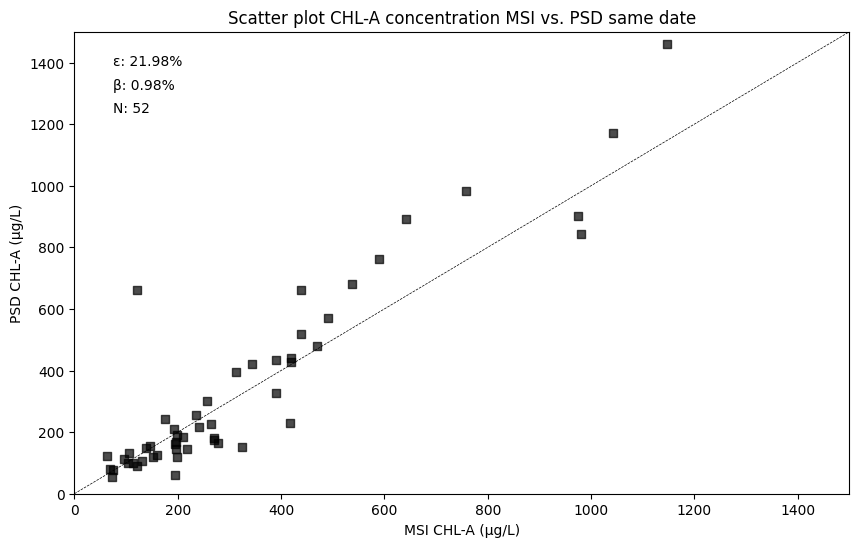

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def error_calc_2(est, med):
    mask = (est != 0) & (med != 0)  # Avoid division by zero
    est = est[mask]
    med = med[mask]

    y = np.log10(est / med)
    error2 = 100 * (10**(abs(y).median()) - 1)

    return error2

def bias_calc(est, med):
    mask = (est != 0) & (med != 0)  # Avoid division by zero
    est = est[mask]
    med = med[mask]

    bias = (np.log10(est) - np.log10(med)).mean()

    return 10**bias

# Converter as colunas de data para datetime, se ainda não estiverem no formato correto
df['date'] = pd.to_datetime(df['date'])
df_psd['date'] = pd.to_datetime(df_psd['date'])

# Fazer o merge dos dataframes com base na coluna de data
merged_df = pd.merge(df, df_psd, on='date', how='inner')

# Calcular o erro e o bias
error = error_calc_2(merged_df['chl-a_psd'], merged_df['chla_median'])
bias = bias_calc(merged_df['chl-a_psd'], merged_df['chla_median'])

# Contar o número de pares de dados
n_points = len(merged_df)

# Criar o scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['chla_median'], merged_df['chl-a_psd'], marker='s', alpha=0.7, color='black')
plt.xlabel('MSI CHL-A (µg/L)')
plt.ylabel('PSD CHL-A (µg/L)')
plt.title('Scatter plot CHL-A concentration MSI vs. PSD same date')

# Definir limites dos eixos
min_val = min(merged_df['chla_median'].min(), merged_df['chl-a_psd'].min())
max_val = max(merged_df['chla_median'].max(), merged_df['chl-a_psd'].max())
plt.xlim(0, 1500)
plt.ylim(0, 1500)

# Adicionar linha de identidade para melhor visualização
plt.plot([0, 1500], [0, 1500], 'r--', color='black', linewidth=0.5)

# Adicionar anotações com o erro, bias e número de pares de dados
plt.text(0.05, 0.95, f'ε: {error:.2f}%', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.05, 0.90, f'β: {bias:.2f}%', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.05, 0.85, f'N: {n_points}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()

merged_df.to_csv('filtered_data.csv', index=True)

<ipython-input-37-6d87989a4a9f>:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1500], [0, 1500], 'r--', color='black', linewidth=0.5, label='1:1 Line')


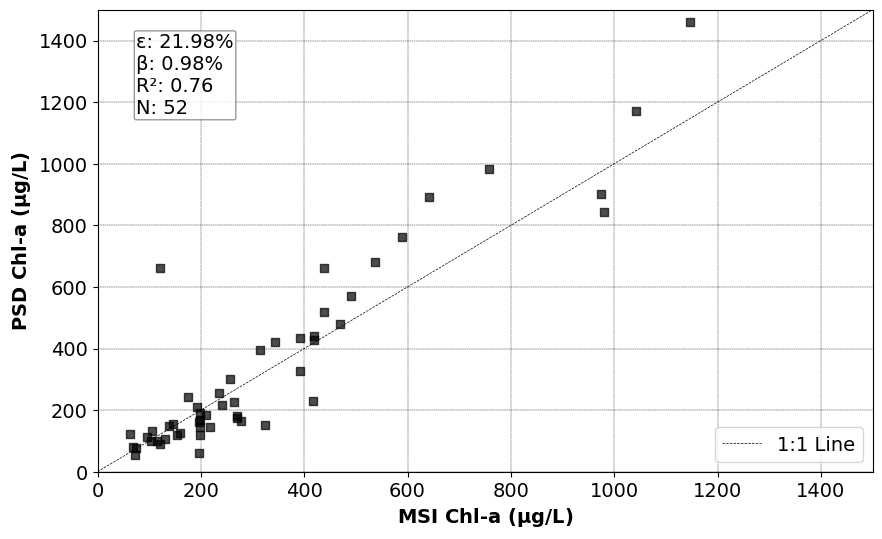

In [ ]:
from sklearn.metrics import r2_score
# Calcular o R^2
r2 = r2_score(merged_df['chla_median'], merged_df['chl-a_psd'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score  # Importa a função para calcular o R^2

def error_calc_2(est, med):
    mask = (est != 0) & (med != 0)  # Evita divisão por zero
    est = est[mask]
    med = med[mask]

    y = np.log10(est / med)
    error2 = 100 * (10**(abs(y).median()) - 1)

    return error2

def bias_calc(est, med):
    mask = (est != 0) & (med != 0)  # Evita divisão por zero
    est = est[mask]
    med = med[mask]

    bias = (np.log10(est) - np.log10(med)).mean()

    return 10**bias

# Converter as colunas de data para datetime, se ainda não estiverem no formato correto
df['date'] = pd.to_datetime(df['date'])
df_psd['date'] = pd.to_datetime(df_psd['date'])

# Fazer o merge dos dataframes com base na coluna de data
merged_df = pd.merge(df, df_psd, on='date', how='inner')

# Calcular o erro, o bias e o R^2
error = error_calc_2(merged_df['chl-a_psd'], merged_df['chla_median'])
bias = bias_calc(merged_df['chl-a_psd'], merged_df['chla_median'])
r2 = r2_score(merged_df['chla_median'], merged_df['chl-a_psd'])

# Contar o número de pares de dados
n_points = len(merged_df)

# Criar o scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['chla_median'], merged_df['chl-a_psd'], marker='s', alpha=0.7, color='black')
#plt.xlabel('MSI CHL-A (µg/L)', fontsize=14)
#plt.ylabel('PSD CHL-A (µg/L)', fontsize=14)
plt.ylabel(r"PSD Chl-$\mathit{\mathbf{a}}$ (µg/L)", fontsize=14, fontweight='bold')
plt.xlabel(r"MSI Chl-$\mathit{\mathbf{a}}$ (µg/L)", fontsize=14, fontweight='bold')

# Definir limites dos eixos
min_val = min(merged_df['chla_median'].min(), merged_df['chl-a_psd'].min())
max_val = max(merged_df['chla_median'].max(), merged_df['chl-a_psd'].max())
plt.xlim(0, 1500)
plt.ylim(0, 1500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(color='black', linestyle='--', linewidth=0.3)



# Adicionar linha de identidade para melhor visualização
plt.plot([0, 1500], [0, 1500], 'r--', color='black', linewidth=0.5, label='1:1 Line')
plt.legend(loc='lower right',fontsize=14)
# Adicionar anotações com o erro, bias, R² e número de pares de dados
#plt.text(0.05, 0.95, f'ε: {error:.2f}%', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
#plt.text(0.05, 0.90, f'β: {bias:.2f}%', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
#plt.text(0.05, 0.85, f'r²: {r2:.2f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
#plt.text(0.05, 0.80, f'N: {n_points}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

annotations = (f'ε: {error:.2f}%\n'
               f'β: {bias:.2f}%\n'
               f'R²: {r2:.2f}\n'
               f'N: {n_points}')

plt.text(0.05, 0.95, annotations, transform=plt.gca().transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.1', alpha=0.8))

plt.show()

In [ ]:
# Contar quantas datas o valor de Chl-a é maior que 100
count_above_100 = sum(1 for date, chl_a in sorted_pairs2 if chl_a > 100)

print(f"Número de datas com Chl-a maior que 100: {count_above_100}")

Número de datas com Chl-a maior que 100: 48
